# CAPSTONE Group_12


* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
* "blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance, in euros (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no")
 
 related with the last contact of the current campaign:

* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric)

 other attributes:
 
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

!pip install pandas_profiling
from pandas_profiling import ProfileReport

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.duplicated().sum()

0

In [5]:
# We can see that there are no duplicate values in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# We have 45211 no. of rows and 17 columns in our dataset
# From the information above we can see that we have 0 null values in our dataset
# We have 7 numeric columns and 10 categorical columns 

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# mean age is 40 , median age is 39 this might indicate age is near normal
# balance column are having negative values indicating customer with negative amount in their account
# mean of day is 15.8 , median day is 16 this might indicate day is near normal
# duration column indicating last_connection with client on call (in seconds)
# campaign column indicating number of campaigns held for client is (2-3) and has reached max to (63)
# atleast 75% of data in pdays column is -1, also maximum-value is quite large this indicates skewed data in respected column
# atleast 75% of data in previous is zero, also maximum-value is bit large this also indicates skewed data in respected column

In [10]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [11]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('COLUMN NAME: ',i)
        print('NO OF UNIQUE CLASSES: ',df[i].nunique())
        print(df[i].describe())
        print()

COLUMN NAME:  job
NO OF UNIQUE CLASSES:  12
count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

COLUMN NAME:  marital
NO OF UNIQUE CLASSES:  3
count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

COLUMN NAME:  education
NO OF UNIQUE CLASSES:  4
count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

COLUMN NAME:  default
NO OF UNIQUE CLASSES:  2
count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

COLUMN NAME:  housing
NO OF UNIQUE CLASSES:  2
count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

COLUMN NAME:  loan
NO OF UNIQUE CLASSES:  2
count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

COLUMN NAME:  contact
NO OF UNIQUE CLASSES:  3
count        45211
unique           3
top       cellular
freq       

In [12]:
# Attribute job has 12 unique values with mode as blue-collar which repeated 9732 times
# Attribute marital has 3 unique values with mode as married which repeated 27214 times
# Attribute education has 4 unique values with mode as secondary which repeated 23202 times

# Attribute default has 2 unique values with mode as no which repeated 44396 times
# Attribute housing has 2 unique values with mode as yes which repeated 25130 times
# Attribute laon has 2 unique values with mode as no which repeated 37967 times

# Attribute contact has 3 unique values with mode as cellular which repeated 29285 times
# Attribute month has 12 unique values with mode as may which repeated 13766 times
# Attribute poutcome has 4 unique values with mode as unknown which repeated 36959 times
# Attribute y(target) has 2 unique values with mode as no which repeated 39922 times



In [13]:
df.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [14]:
df_num = df.select_dtypes(include = np.number)

df_cat = df.select_dtypes(include = 'object')

# Univariate Analysis

age


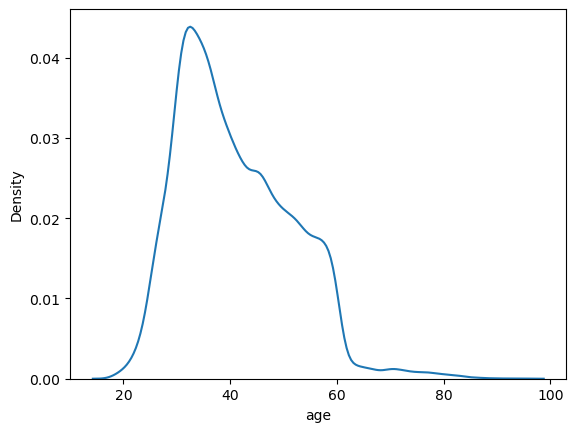

balance


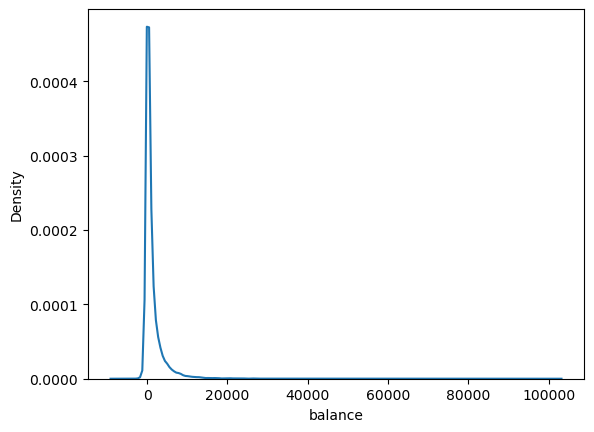

day


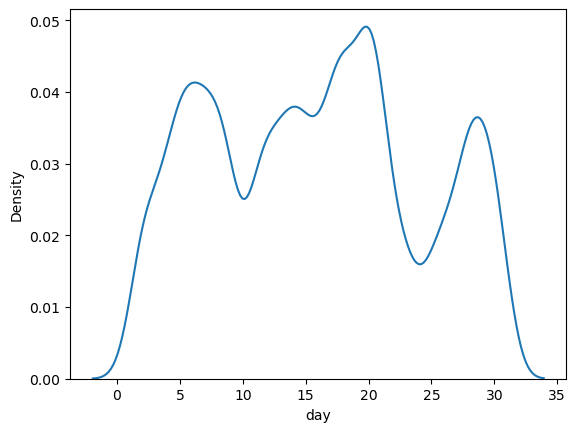

duration


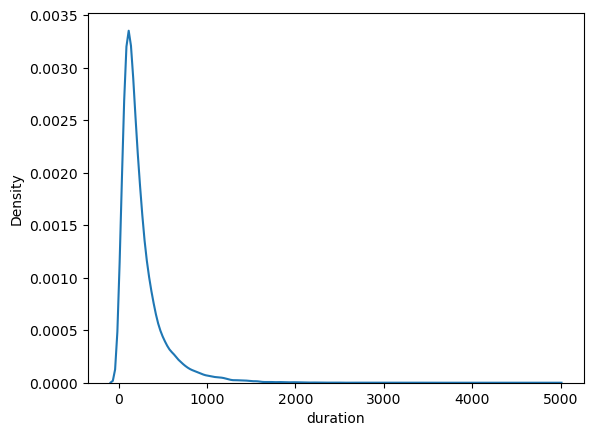

campaign


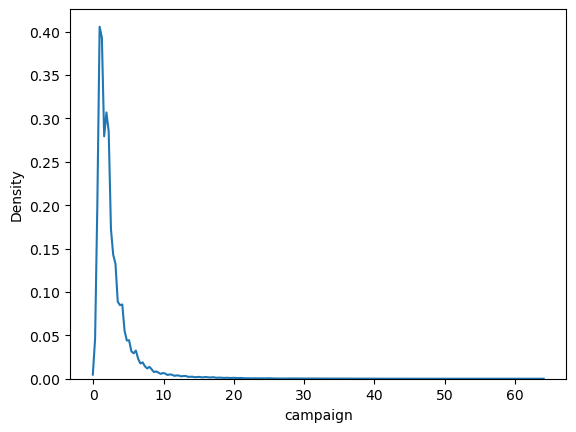

pdays


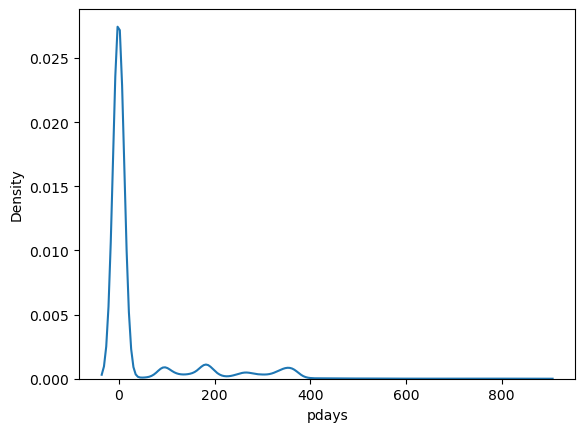

previous


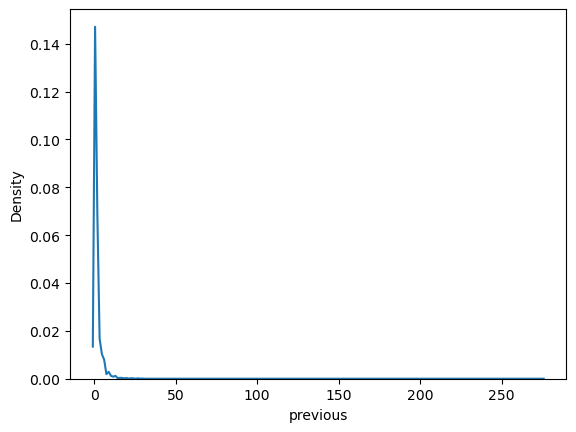

In [15]:
for i in df_num:
    print(i)
    sns.kdeplot(df_num[i])
    plt.show()

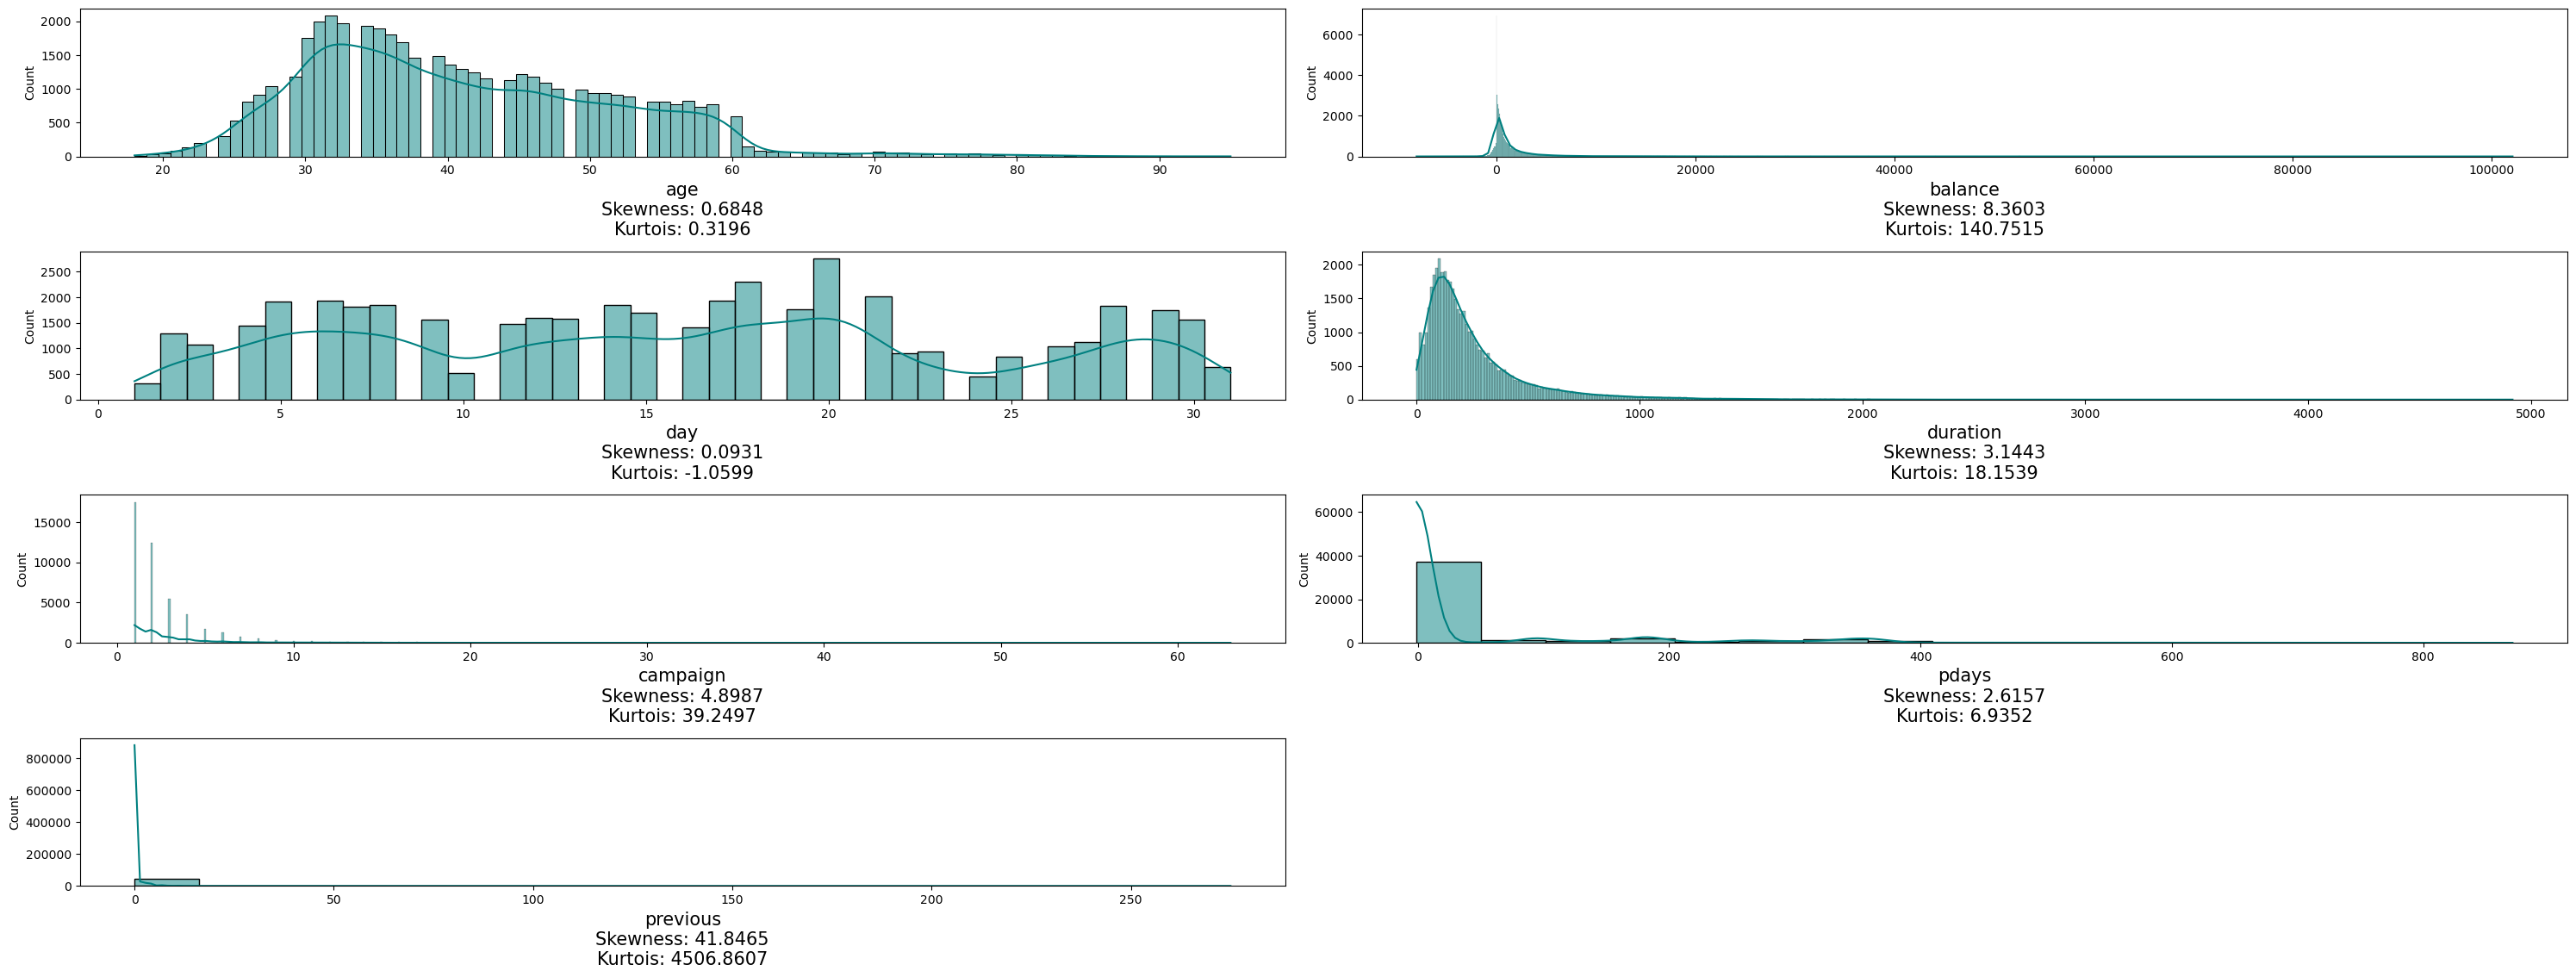

In [16]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(30,50),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df[i].skew() < 0 :
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

In [17]:
print('Skewness and Kurtosis of all numerical data\n')
for i in df_num:
    print(i,'Skewness :', df_num[i].skew())
    print(i,'Kurtosis :', df_num[i].kurt(),'\n')

Skewness and Kurtosis of all numerical data

age Skewness : 0.6848179257252598
age Kurtosis : 0.3195703759105042 

balance Skewness : 8.360308326166326
balance Kurtosis : 140.75154662504158 

day Skewness : 0.09307901402122411
day Kurtosis : -1.0598973728286003 

duration Skewness : 3.144318099423456
duration Kurtosis : 18.153915269019706 

campaign Skewness : 4.898650166179674
campaign Kurtosis : 39.2496508023021 

pdays Skewness : 2.6157154736563477
pdays Kurtosis : 6.935195210422799 

previous Skewness : 41.84645447266292
previous Kurtosis : 4506.860660183261 



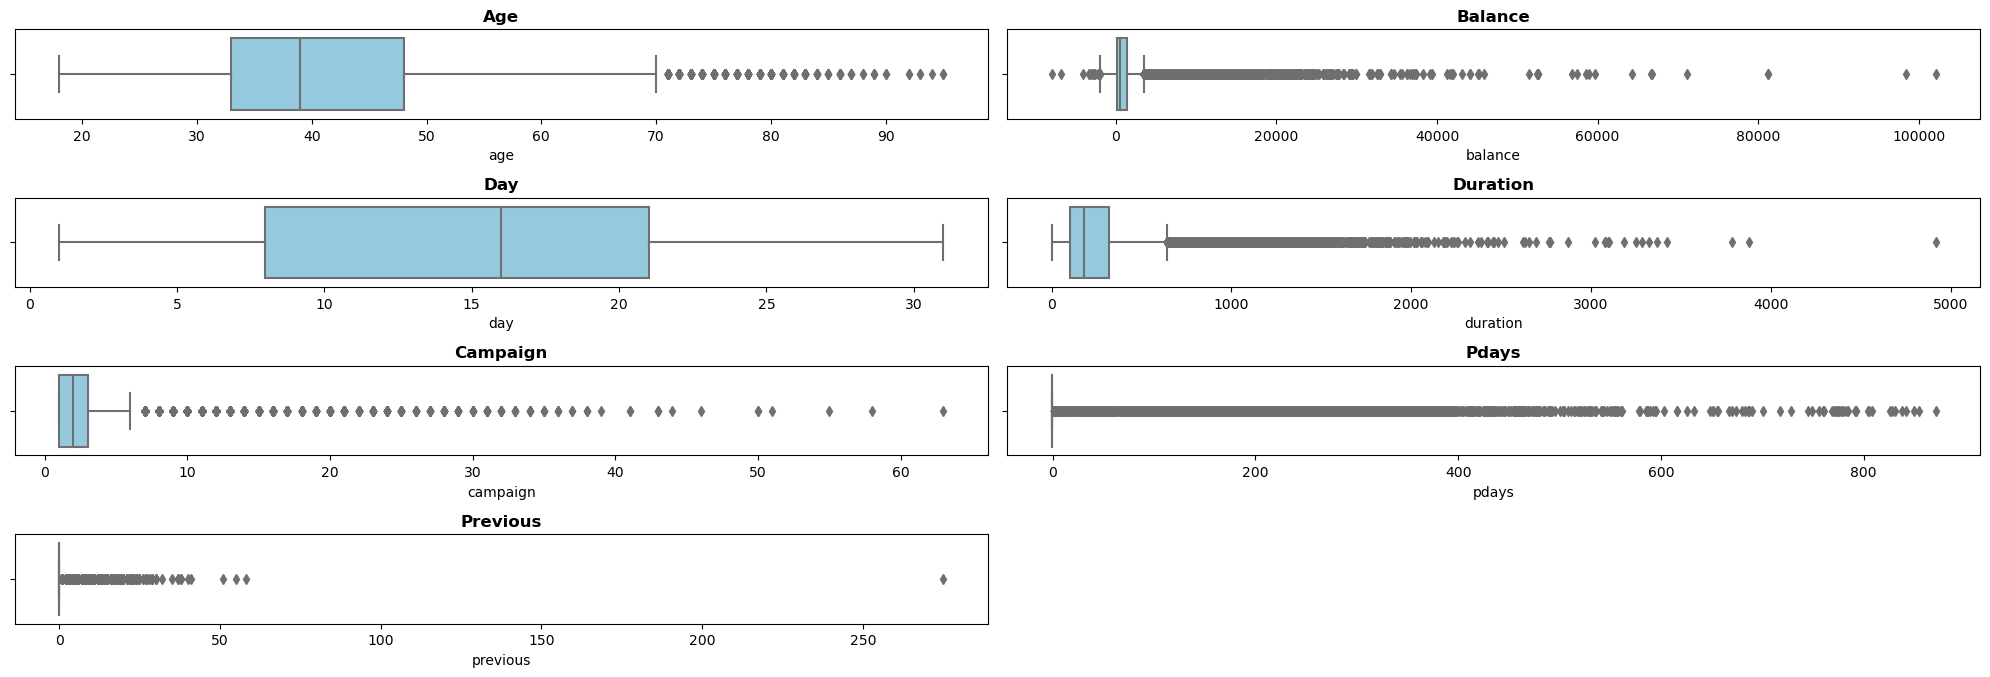

In [18]:
#checking for outliers by visualisizing boxplot

plt.figure(figsize=(20,30),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    sns.boxplot(df[i],color='SkyBlue')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

job


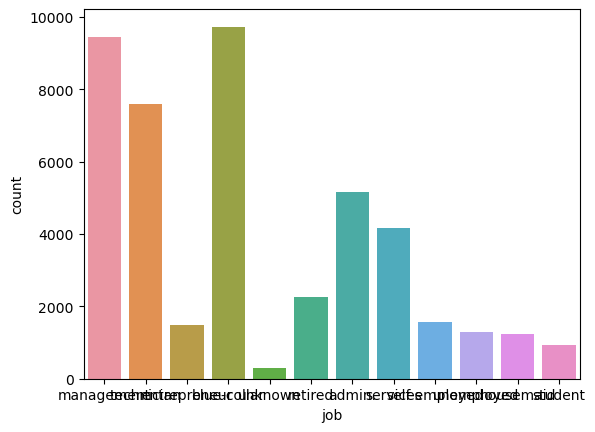

marital


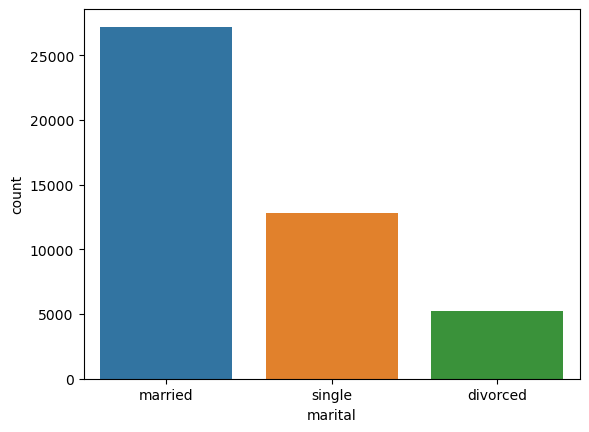

education


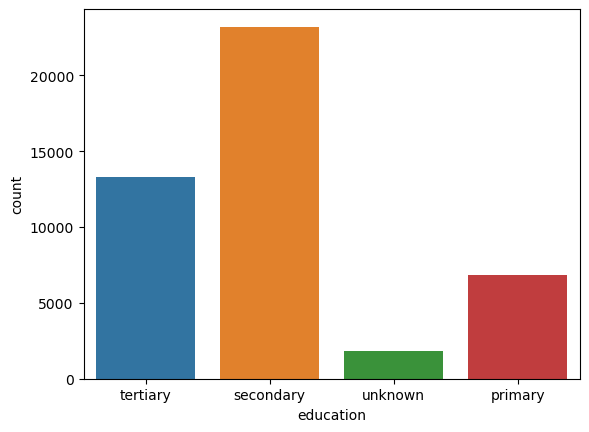

default


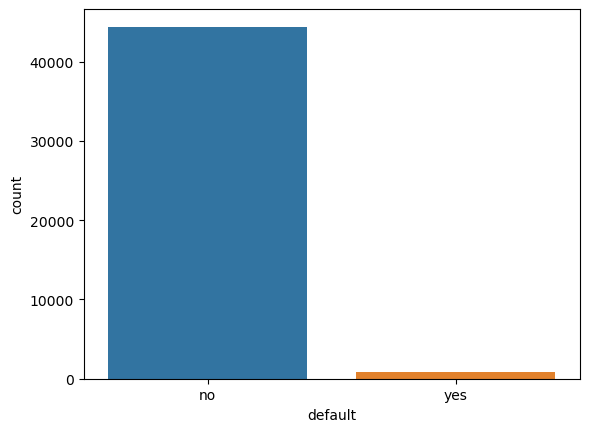

housing


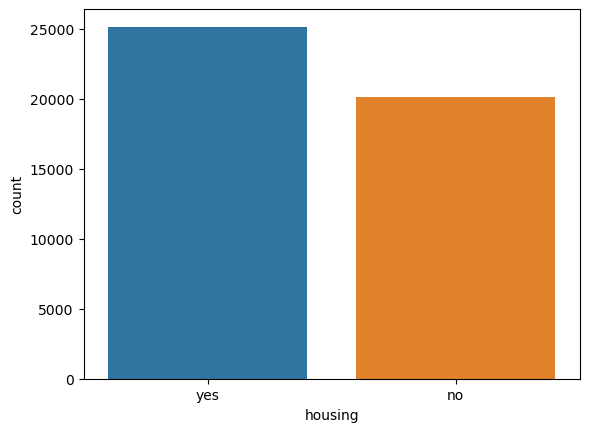

loan


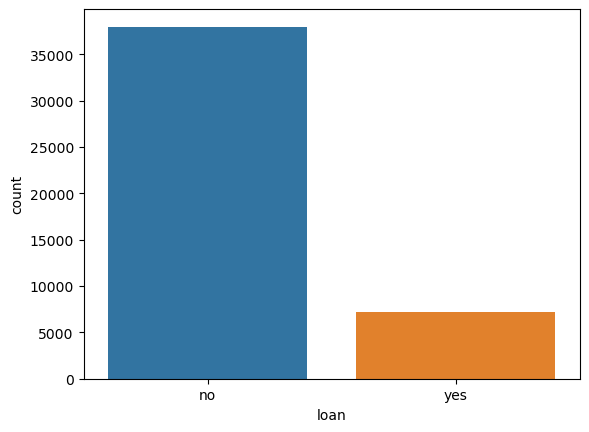

contact


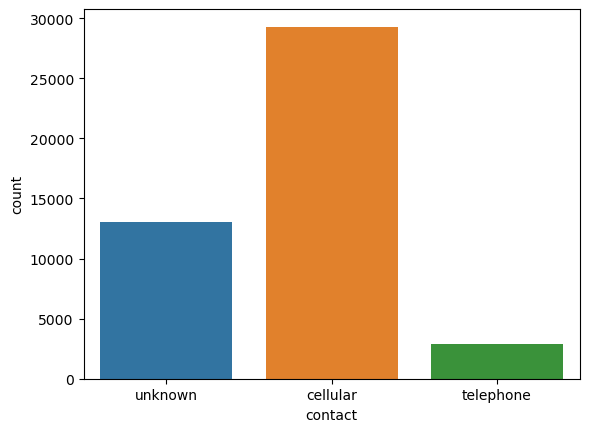

month


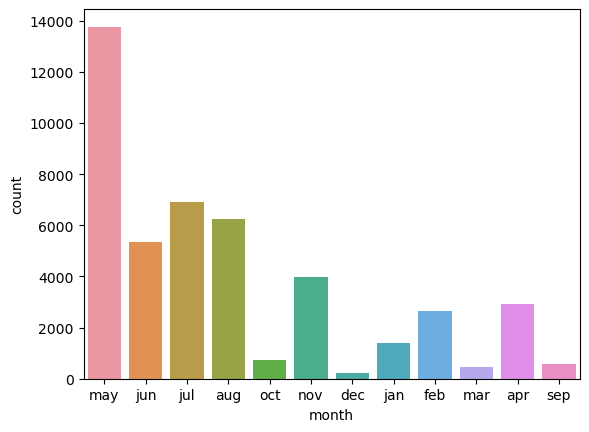

poutcome


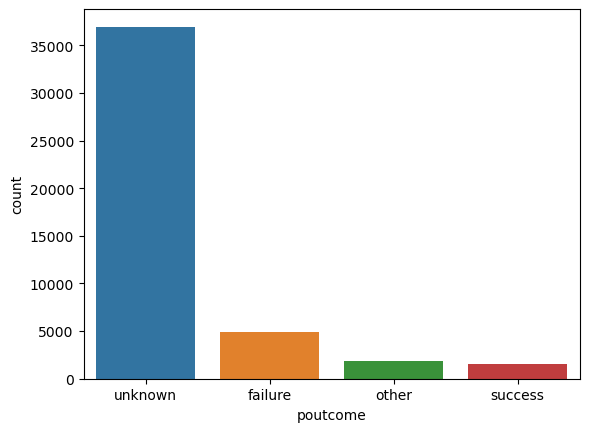

y


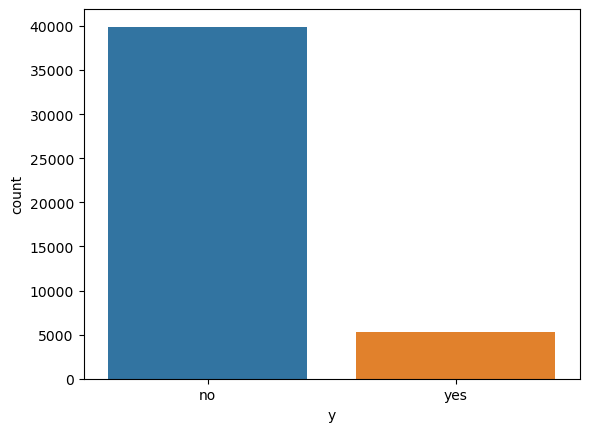

In [19]:
for i in df_cat:
    print(i)
    sns.countplot(df_cat[i])
    plt.show()

In [21]:
df['y'].value_counts()

no     88.30152
yes    11.69848
Name: y, dtype: float64

<AxesSubplot:xlabel='y', ylabel='count'>

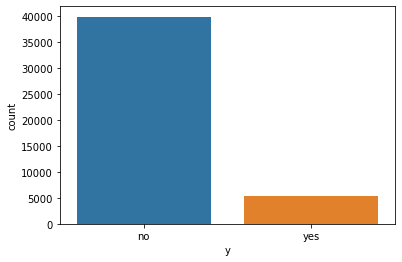

In [77]:
sns.countplot(df['y'])

# Bivariate Analysis

### Numerical VS Numerical

In [78]:
def num_distributions(var_1, var_2):
    age_dur = df[[var_1, var_2, "y"]]
    
    sns.scatterplot(
        data=age_dur,
        x=var_1,
        y=var_2,
        hue="y",
        legend=False,
        alpha=0.6,
    )

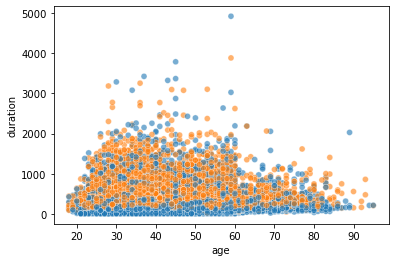

In [79]:
num_distributions("age", "duration")

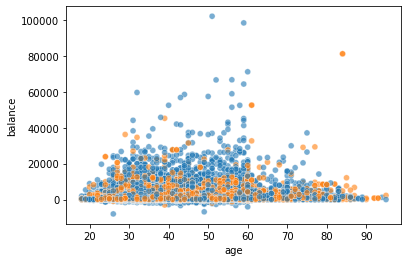

In [80]:
num_distributions("age", "balance")

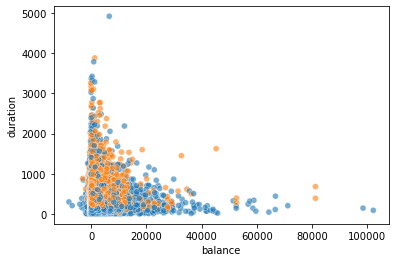

In [81]:
num_distributions("balance", "duration")

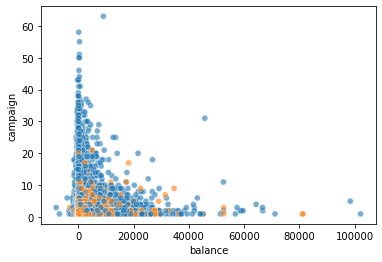

In [82]:
num_distributions("balance", "campaign")

### Categorical VS Categorical

In [83]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [84]:
for i in df_cat:
    print(pd.crosstab(df[i],df['y']))
    print()

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252

y           no   yes
default             
no       39159  5237
yes        763    52

y           no   yes
housing             
no       16727  3354
yes      23195  1935

y        no   yes
loan             
no    33162  4805
yes    6760   484

y             no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530

y         no  yes
month   

### Categorical VS Numerical

age


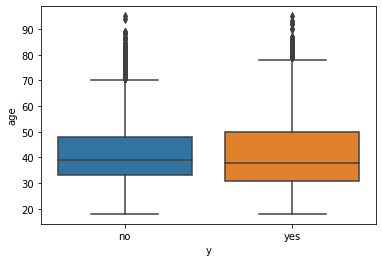

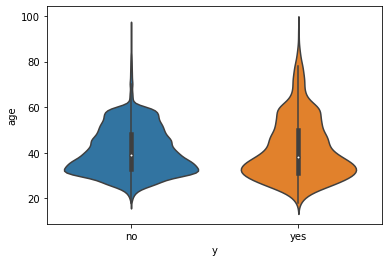

balance


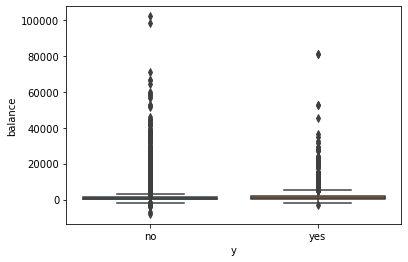

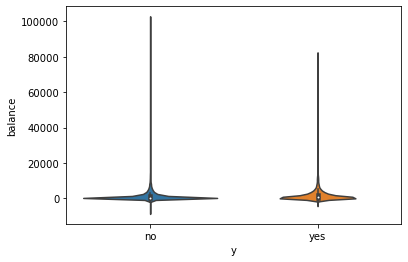

day


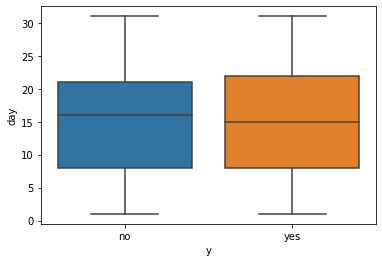

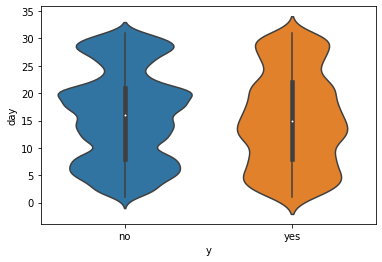

duration


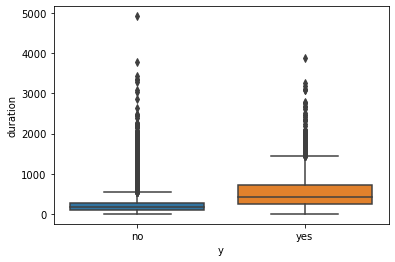

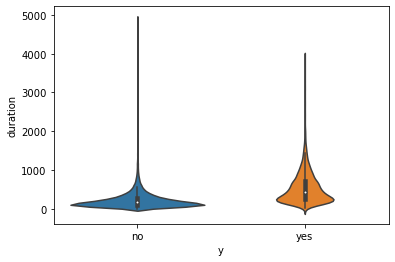

campaign


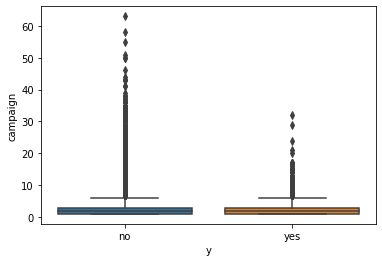

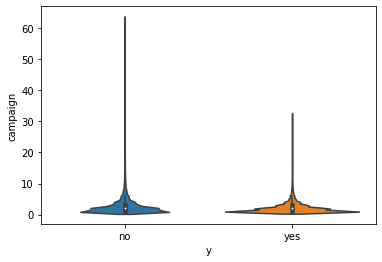

pdays


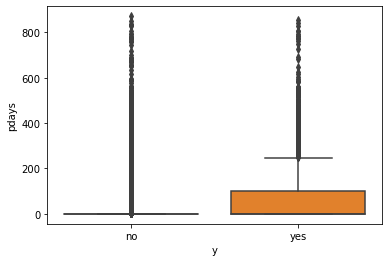

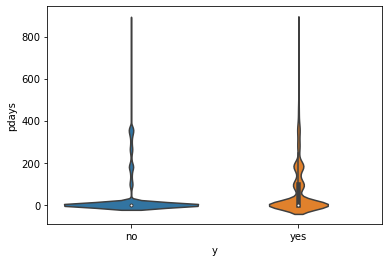

previous


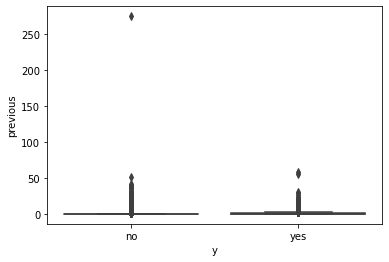

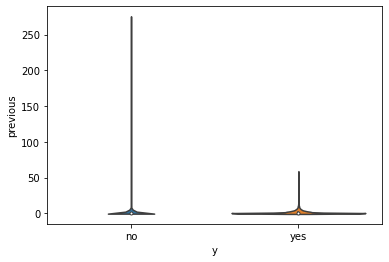

In [85]:
for i in df_num:
    print(i)
    sns.boxplot(y = df[i], x = df['y'])
    plt.show()
    sns.violinplot(y = df[i],x = df['y'])
    plt.show()

# Multivariate Analysis

<AxesSubplot:>

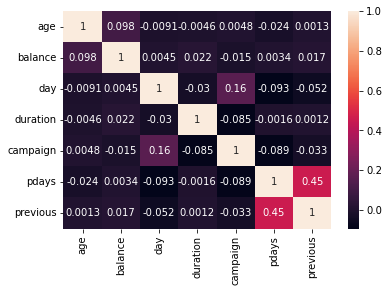

In [86]:
sns.heatmap(df.corr(), annot=True)

In [87]:
# List only the Categorical columns
print(df_cat)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
# Define the bins for the age groups
bins = [0, 18, 25, 35, 50, 65, 100]

# Define the labels for the age groups
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']

# Create a new column with the age group for each row
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

In [89]:
df['age_group'].value_counts()

36-50    19049
26-35    15571
51-65     8504
19-25     1324
65+        751
0-18        12
Name: age_group, dtype: int64

In [90]:
# Now we can drop the age column
df.drop('age',axis=1,inplace=True)

In [91]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [92]:
# Define the bins for the day groups
bins = [0, 7, 14, 21, 28, 31]

# Define the labels for the day groups
labels = ['1-7', '8-14', '15-21', '22-28', '29-31']

# Create a new column with the day group for each row
df['day_of_month'] = pd.cut(df['day'], bins=bins, labels=labels, include_lowest=True)

In [93]:
df['day_of_month'].value_counts()

15-21    13900
8-14     10442
1-7       9798
22-28     7117
29-31     3954
Name: day_of_month, dtype: int64

In [94]:
df.drop('day',axis=1,inplace=True)

In [95]:
df['age_group'] = df['age_group'].astype(object)
df['day_of_month'] = df['day_of_month'].astype(object)

In [96]:
cat_cols = df.select_dtypes(include='object')
cat_cols.columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y',
 'age_group',
 'day_of_month']

In [97]:
num_cols = df.select_dtypes(exclude='object')
num_cols.columns.tolist()

['balance', 'duration', 'campaign', 'pdays', 'previous']

In [98]:
cat_cols_features = cat_cols.drop('y',axis=1)
df_target = cat_cols['y']

In [99]:
for i in cat_cols_features.columns:
    
    print('\n\nfor: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    
    table=pd.crosstab(cat_cols_features[i],df_target)
    observed_value=table.values
    
    # use the 'chi2_contingency()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
    # pass the observed values to the parameter, 'observed'
    # 'correction = False' will not apply the Yates' correction
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

    print("Test statistic:", test_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected values:", '\n',expected_value)
    
    if p > 0.05:
        print('The above output shows that the chi-square the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i))        



for:  job
The null and alternative hypothesis is:
 
H0: The variables job and loan_status are independent
H1: The variables job and loan_status are not independent

Test statistic: 836.1054877471965
p-value: 3.337121944935502e-172
Degrees of freedom: 11
Expected values: 
 [[4566.0715755   604.9284245 ]
 [8593.5038818  1138.4961182 ]
 [1313.04359559  173.95640441]
 [1094.93884232  145.06115768]
 [8351.55771825 1106.44228175]
 [1999.14640242  264.85359758]
 [1394.28099356  184.71900644]
 [3668.04512176  485.95487824]
 [ 828.2682533   109.7317467 ]
 [6708.26643958  888.73356042]
 [1150.56879963  152.43120037]
 [ 254.30837628   33.69162372]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables job and loan_status are dependent.


for:  marital
The null and alternative hypothesis is:
 
H0: The variables marital and loan_status are independent
H1: The variables marital and loan_status are not indepe

In [100]:
print('The dependent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in cat_cols_features.columns:
    table=pd.crosstab(cat_cols_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p < 0.05:
        print(i)

The dependent categorical variable found after Chi-Square Test for Independence are:

job
marital
education
default
housing
loan
contact
month
poutcome
age_group
day_of_month


In [101]:
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])
significant_variable

,Feature,Statistical Test,P-Value,Inference


In [102]:
for i in cat_cols_features.columns:
    table=pd.crosstab(cat_cols_features[i],df_target)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,job,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
1,marital,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
2,education,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
3,default,Chi-Square Test for Independence,0.000002,Dependent categorical variable found after Chi...
4,housing,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
5,loan,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
6,contact,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
7,month,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
8,poutcome,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...
9,age_group,Chi-Square Test for Independence,0.0,Dependent categorical variable found after Chi...


In [103]:
df['y'] = df['y'].replace({"Yes":1,'No':0})

In [104]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_num.columns:
    df_num[i]=PT.fit_transform(df_num[[i]])

In [105]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.473637,0.414773,-1.351873,0.386077,-1.108191,-0.472533,-0.4725
1,0.429379,-0.410774,-1.351873,-0.223033,-1.108191,-0.472533,-0.4725
2,-0.709873,-0.431122,-1.351873,-0.923854,-1.108191,-0.472533,-0.4725
3,0.683128,0.197685,-1.351873,-0.735678,-1.108191,-0.472533,-0.4725
4,-0.709873,-0.432119,-1.351873,0.072812,-1.108191,-0.472533,-0.4725


In [106]:
df_cat = df.select_dtypes(include=[np.object])
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_group,day_of_month
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,51-65,1-7
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,36-50,1-7
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,26-35,1-7
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,36-50,1-7
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,26-35,1-7


In [108]:
cat=df.select_dtypes(include='object').columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'age_group', 'day_of_month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_f[cat]=enc.fit_transform(cat_f[cat])

In [52]:
df_cat_enc= pd.get_dummies(df_cat, drop_first=True)
df_cat_enc.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,age_group_19-25,age_group_26-35,age_group_36-50,age_group_51-65,age_group_65+,day_of_month_15-21,day_of_month_22-28,day_of_month_29-31,day_of_month_8-14
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [53]:
df_final = pd.concat([df_num,df_cat_enc], axis =1)
df_final.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,age_group_19-25,age_group_26-35,age_group_36-50,age_group_51-65,age_group_65+,day_of_month_15-21,day_of_month_22-28,day_of_month_29-31,day_of_month_8-14
0,1.473637,0.414773,-1.351873,0.386077,-1.108191,-0.472533,-0.4725,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.429379,-0.410774,-1.351873,-0.223033,-1.108191,-0.472533,-0.4725,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,-0.709873,-0.431122,-1.351873,-0.923854,-1.108191,-0.472533,-0.4725,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0.683128,0.197685,-1.351873,-0.735678,-1.108191,-0.472533,-0.4725,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,-0.709873,-0.432119,-1.351873,0.072812,-1.108191,-0.472533,-0.4725,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [54]:
df_final.isnull().sum().sum()

0

In [55]:
df_final.to_csv('EDA_Marketing_Strategy.csv',sep=',')

In [56]:
df_final.rename(columns={'y_yes': 'Target'} , inplace=True)